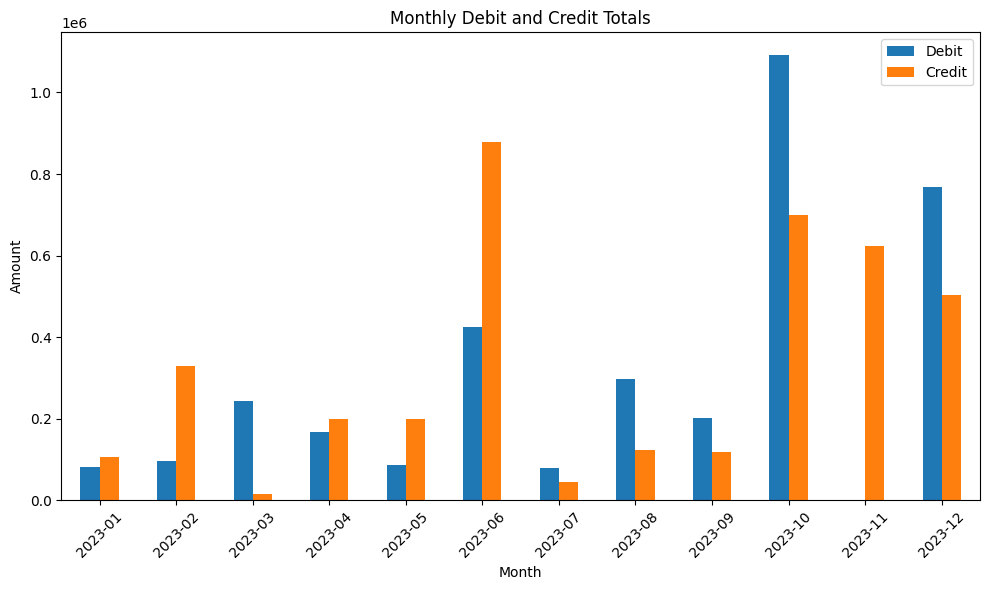

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# Step 1: Define the directory containing the CSV files
directory_path = "../data/output/"  # Replace with the path to your directory

# Step 2: Initialize an empty DataFrame to store combined data
df = pd.DataFrame()

# Step 3: Iterate through all CSV files in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith(".csv"):  # Ensure we only process CSV files
        file_path = os.path.join(directory_path, file_name)
        # Read the CSV and append it to the combined DataFrame
        month_data = pd.read_csv(file_path)
        df = pd.concat([df, month_data], ignore_index=True)

# Remove rows where 'Txn Date' is invalid (e.g., headers repeated)
# df = df[df['Txn Date'] != 'Txn Date']

# Convert 'Txn Date' to datetime, ignoring invalid formats
df['Txn Date'] = pd.to_datetime(df['Txn Date'], format='%d %b %Y', errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Txn Date'])

# Extract month and year
df['Month'] = df['Txn Date'].dt.strftime('%Y-%m')

# Clean Debit and Credit columns
df['Debit'] = df['Debit'].replace({',': ''}, regex=True).astype(float, errors='ignore').fillna(0)
df['Credit'] = df['Credit'].replace({',': ''}, regex=True).astype(float, errors='ignore').fillna(0)

# Aggregate data by Month
agg_data = df.groupby('Month').agg({'Debit': 'sum', 'Credit': 'sum'})

# Plot Bar Chart
agg_data.plot(kind='bar', figsize=(10, 6), title="Monthly Debit and Credit Totals")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


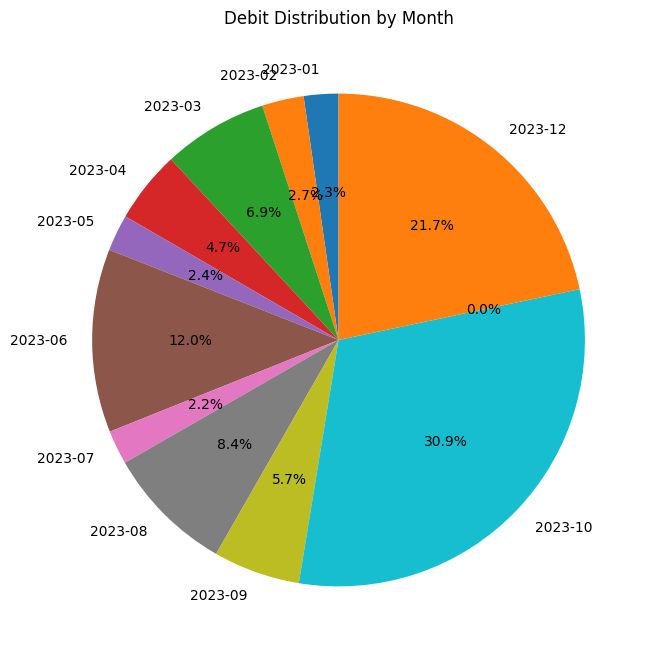

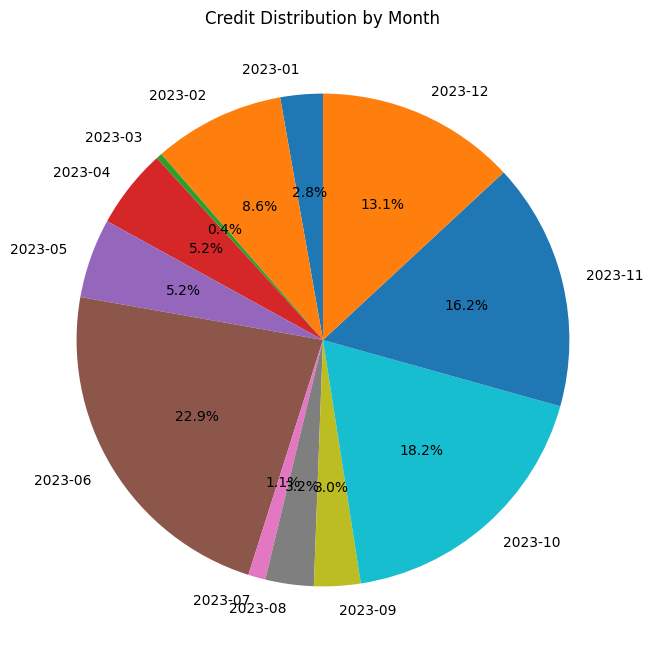

In [11]:
# Plot Pie Charts
# Debit Pie Chart
plt.figure(figsize=(8, 8))
agg_data['Debit'].plot.pie(autopct='%1.1f%%', startangle=90, title="Debit Distribution by Month")
plt.ylabel("")
plt.show()

# Credit Pie Chart
plt.figure(figsize=(8, 8))
agg_data['Credit'].plot.pie(autopct='%1.1f%%', startangle=90, title="Credit Distribution by Month")
plt.ylabel("")
plt.show()